In [65]:
import tarfile
my_tar = tarfile.open('aclImdb_v1.tar.gz')
my_tar.extractall('./') # specify which folder to extract to
my_tar.close()


In [4]:
# filepath = filepath + "/pos"
import os
import pandas as pd


def createdata(filename, tag):
    ratings = []
    reviews= []
    index_ = []
    for file in os.walk(filename):
        dir_ = file[0]
        for i in file[2]:
            rating = i.split(".")[0]
            index = rating.split("_")[0]
            index_.append(index)
            rating = rating.split("_")[1]
            ratings.append(rating)
            
            with open(dir_ + "\\" + i, encoding="utf8") as f:
                review = f.read()
                reviews.append(review)

    mydf = pd.DataFrame(list(zip(reviews, ratings)), columns = ['Reviews', 'Ratings'])
    return mydf
        
    


In [5]:
df_neg = createdata(r"C:\Users\Asmeeta\Documents\AdaptReady\aclImdb\train\neg", "neg")

In [6]:
df_pos = createdata(r"C:\Users\Asmeeta\Documents\AdaptReady\aclImdb\train\pos", "pos")

In [7]:
df_neg_test = createdata(r"C:\Users\Asmeeta\Documents\AdaptReady\aclImdb\test\neg", "neg")
df_pos_test = createdata(r"C:\Users\Asmeeta\Documents\AdaptReady\aclImdb\test\pos", "pos")

In [10]:
#creating a smaller dataset
def less_data(df_pos, df_neg):
    top_df_pos = df_pos.iloc[0:1250,:]
    top_df_neg = df_neg.iloc[0:1250,:]
    frames = [top_df_pos, top_df_neg]
    df_ = pd.concat(frames)
    len(df_)
    return df_

In [11]:
df_test = less_data(df_pos_test,df_neg_test)
len(df_test)


2500

In [13]:
df_train = less_data(df_pos,df_neg)
len(df_train)


2500

In [14]:
df_train.to_csv("less_train_data.csv")
df_test.to_csv("less_test_data.csv")

In [16]:
def labelmaker(x):
    x = float(x)
    if x >= 7:
        return 1
    elif x <= 4:
        return 0
    else :
        return -1

In [17]:
df_train["Label"] = df_train["Ratings"].apply(labelmaker)

In [18]:
df_train["Label"].value_counts()

1    1250
0    1250
Name: Label, dtype: int64

In [19]:
df_test["Label"] = df_train["Ratings"].apply(labelmaker)
df_test["Label"].value_counts()

1    1250
0    1250
Name: Label, dtype: int64

In [99]:
#downloading GLove word embeddings

# !wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [113]:
import wget
URL = "http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip"
response = wget.download(URL, "glove.6B")

In [112]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=065aacf4efa3012c291b032ab64f40b0928bd327f59c14b759080e6ae879a1d8
  Stored in directory: c:\users\asmeeta\appdata\local\pip\cache\wheels\a1\b6\7c\0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [115]:
from zipfile import ZipFile

with ZipFile('glove.6B', 'r') as f:

#extract in current directory
    f.extractall()

In [20]:
#adding the words from the word embedding dict as key and value as the vectors
import numpy as np

def add_words_dict(dict_,filename):
    with open(filename, "r", encoding="utf8") as f:
        for line in f.readlines():
            line = line.split(" ")
            
            try:
                dict_[line[0]] = np.array(line[1:], dtype =float)
            except:
                continue
                
    

In [21]:
words = {}

add_words_dict(words,"glove.6B.50d.txt")

In [22]:
len(words)

400000

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

C:\Users\Asmeeta\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Asmeeta\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://num

In [24]:
stop_words = set(stopwords.words('english'))

In [25]:
#removing stopwords and text cleaning
def preprocessing(df):
    df["Reviews"] = df["Reviews"].apply(lambda x : " ".join([word for word in x.split(" ") if word not in stop_words]))
    df["Reviews"] = df["Reviews"].apply(lambda x : re.sub('<.*?>','',x)) 
    return df

In [26]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()

In [27]:
#a function that converts a sentence to a list of tokens
def convert_to_token_list(x):
    tokens = tokenizer.tokenize(x)
    lowercase_tokens = [t.lower() for t in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercase_tokens]
    actual_tokens = [t for t in lemmatized_tokens if t in words]
    
    return actual_tokens

In [29]:
#function that convert a sentence to a list a array of vectors
def convert_to_vectors(message, word_dict = words):
    converted_to_tokenlist = convert_to_token_list(message)
    
    converted_to_vectors = []
    
    for word in converted_to_tokenlist:
        if word not in word_dict:
            continue
            
            
        vector = word_dict[word]
        converted_to_vectors.append(vector)
            
    return np.array(converted_to_vectors, dtype= float)

In [30]:
sent = convert_to_vectors("hello darkness", words)

In [31]:
sent.shape

(2, 50)

In [36]:
len(X_train)

1750

In [39]:
#function that converts a dataframe to list of vectors
def dataframe_processing(df):
    df = preprocessing(df)
    label = df["Label"].to_numpy().astype(int)
    
    word_vectors = []
    
    for review in df["Reviews"]:
        converted_sentence_tovec = convert_to_vectors(review)
        
        if converted_sentence_tovec.shape[0]==0:
            converted_sentence_tovec = np.zeros(shape = (1,50))
            
        word_vectors.append(converted_sentence_tovec)
        
    return word_vectors, label
            
    
    
    

In [73]:
frames = [df_train, df_test]
df = pd.concat(frames)

In [95]:
split_1 = int(len(df) *0.7)
split_2 = int(len(df) *0.85)

train_df, test_df,val_df = df[0:split_1], df[split_1:split_2], df[split_2:]

len(train_df), len(test_df), len(val_df)

(3500, 750, 750)

In [96]:
X_train, y_train = dataframe_processing(train_df)

C:\Users\Asmeeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Asmeeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
len(X_train), len(X_train[0])

(3500, 85)

(array([1.801e+03, 1.087e+03, 3.500e+02, 1.530e+02, 5.700e+01, 4.000e+01,
        9.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([  5. , 103.2, 201.4, 299.6, 397.8, 496. , 594.2, 692.4, 790.6,
        888.8, 987. ]),
 <a list of 10 Patch objects>)

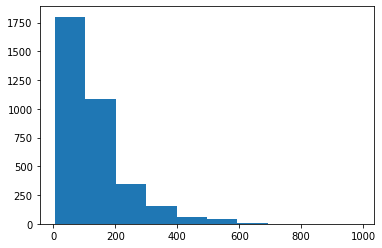

In [99]:
#trying to find the maximum lenght of sentences
sequence_length = []
for i in range(len(X_train)):
    sequence_length.append(len(X_train[i]))
    
import matplotlib.pyplot as plt

plt.hist(sequence_length)

In [100]:
pd.Series(sequence_length).describe()

count    3500.000000
mean      134.938571
std       100.611630
min         5.000000
25%        74.000000
50%       101.000000
75%       162.000000
max       987.000000
dtype: float64

In [101]:
max_ = 1000
#inserting zeros to the vectors so that all the sentences have the same length
from copy import deepcopy

def padding(X, desired_sequence_len = 1000):
    x_copy = deepcopy(X)
    
    for i, x in enumerate(X):
        seq_len = x.shape[0]
        seq_len_diff = desired_sequence_len - seq_len
        
        pad = np.zeros(shape = (seq_len_diff, 50))
        
        x_copy[i] = np.concatenate([x,pad])
        
    return np.array(x_copy).astype(float)

In [102]:
X_train = padding(X_train)

In [103]:
X_train.shape

(3500, 1000, 50)

In [104]:
y_train.shape

(3500,)

In [105]:
X_test, y_test = dataframe_processing(test_df)
X_test = padding(X_test)
X_test.shape, y_test.shape

C:\Users\Asmeeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Asmeeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


((750, 1000, 50), (750,))

In [107]:
X_val, y_val = dataframe_processing(val_df)
X_val = padding(X_val)
X_val.shape, y_val.shape

C:\Users\Asmeeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Asmeeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


((750, 1000, 50), (750,))

In [110]:
#LSTM
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


model = Sequential([])

model.add(layers.Input(shape=(1000,50)))
model.add(layers.LSTM(64, return_sequences = True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences = True))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = "sigmoid"))

In [111]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1000, 64)          29440     
                                                                 
 dropout_2 (Dropout)         (None, 1000, 64)          0         
                                                                 
 lstm_3 (LSTM)               (None, 1000, 64)          33024     
                                                                 
 dropout_3 (Dropout)         (None, 1000, 64)          0         
                                                                 
 flatten (Flatten)           (None, 64000)             0         
                                                                 
 dense (Dense)               (None, 1)                 64001     
                                                                 
Total params: 126,465
Trainable params: 126,465
Non-tr

In [114]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
# from tensorflwo.keras.metrics 
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint('model/', save_best_only = True)

model.compile(optimizer = Adam(learning_rate = 0.001),
             loss = BinaryCrossentropy(),
             metrics = ['accuracy'])

In [118]:
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5, callbacks = [cp])

Epoch 1/5
110/110 [==============================] - ETA: 0s - loss: 0.5336 - accuracy: 0.7320

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


110/110 [==============================] - 132s 1s/step - loss: 0.5336 - accuracy: 0.7320 - val_loss: 0.5677 - val_accuracy: 0.6933
Epoch 2/5
110/110 [==============================] - ETA: 0s - loss: 0.4413 - accuracy: 0.7971

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


110/110 [==============================] - 121s 1s/step - loss: 0.4413 - accuracy: 0.7971 - val_loss: 0.4098 - val_accuracy: 0.8080
Epoch 3/5
110/110 [==============================] - 132s 1s/step - loss: 0.4030 - accuracy: 0.8191 - val_loss: 0.7206 - val_accuracy: 0.6627
Epoch 4/5
110/110 [==============================] - ETA: 0s - loss: 0.3653 - accuracy: 0.8389

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


110/110 [==============================] - 136s 1s/step - loss: 0.3653 - accuracy: 0.8389 - val_loss: 0.3694 - val_accuracy: 0.8293
Epoch 5/5
110/110 [==============================] - 170s 2s/step - loss: 0.3107 - accuracy: 0.8663 - val_loss: 0.6889 - val_accuracy: 0.6720


In [119]:
from tensorflow.keras.models import load_model

best_model = load_model("model/")

In [125]:
test_prediction = (best_model.predict(X_test)>0.5).astype(int)

24/24 [==============================] - 9s 394ms/step


In [126]:
test_prediction

from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       500
           1       0.69      0.87      0.77       250

    accuracy                           0.83       750
   macro avg       0.81      0.84      0.82       750
weighted avg       0.85      0.83      0.83       750



array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    